In [1]:
#!pip install tensorflow
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [15]:
#!pip install tensorflow  --default-timeout=1000
from tensorflow.keras.datasets import mnist

# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

(train_images, train_labels),(test_images, test_labels) = mnist.load_data()


In [16]:
# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [17]:
type(train_images)

numpy.ndarray

In [18]:
train_images.dtype

dtype('uint8')

In [19]:
train_images.ndim

3

In [20]:
train_images.shape

(60000, 28, 28)

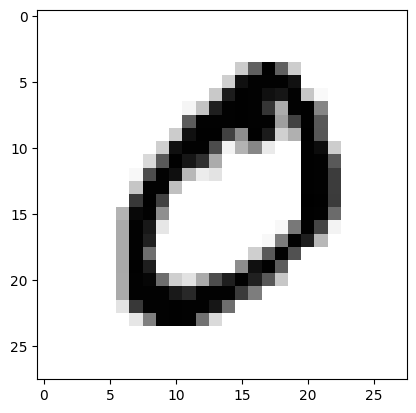

In [21]:
import matplotlib.pyplot as plt
plt.imshow(train_images[1,:,:], cmap = plt.cm.binary)
plt.show()

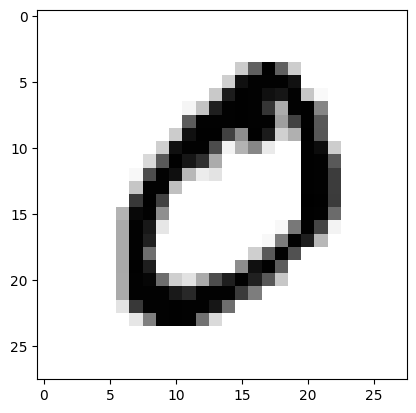

In [22]:
plt.imshow(train_images[1,:,:], cmap = plt.cm.binary)
plt.show()

In [23]:
type(train_labels)

numpy.ndarray

In [24]:
train_labels.shape

(60000,)

In [25]:
train_labels[1]

np.uint8(0)

In [26]:
train_labels[2]

np.uint8(4)

In [27]:
type(test_images)

numpy.ndarray

In [28]:
test_images.shape

(10000, 28, 28)

In [29]:
test_images.ndim

3

In [30]:
test_labels.shape

(10000,)

In [31]:
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype("float32")/255

In [32]:
test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype("float32")/255

In [33]:
train_images.shape

(60000, 784)

In [34]:
test_images.shape

(10000, 784)

In [35]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [36]:
from keras import models
from keras import layers

In [37]:
model = models.Sequential()

In [38]:
model.add(layers.Dense(512, activation = "relu", input_shape = (28*28, )))
model.add(layers.Dense(10, activation = "softmax"))

C:\Users\Neliswa\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.compile(optimizer= "rmsprop",
             loss = "categorical_crossentropy",
             metrics = ["accuracy"])

In [41]:
model.fit(train_images,
         train_labels,
         epochs = 5,
         batch_size = 128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8741 - loss: 0.4329
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9656 - loss: 0.1188
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9792 - loss: 0.0692
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9848 - loss: 0.0505
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9882 - loss: 0.0408


In [42]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("test_loss : ", test_loss,"\ntest_acc : ", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9783 - loss: 0.0704
test_loss :  0.05996468663215637 
test_acc :  0.9814000129699707
